# ⚽ La Liga Match Analysis (2019–2025)

## 📚 Table of Contents

1. Introduction
2. Objectives
3.   [Data Cleaning and Preparation](#)
4. [Exploratory Data Analysis](#)
   - Team performance overview
   - Expected goals vs. actual goals 
   - Home vs. away influence  
   - Penalty kick efficiency  
   - Match timing patterns  
5. [Conclusion](#)
6. [Next Steps](#)

## Introduction

This project explores data from La Liga matches between the 2019 and 2025 seasons. By performing exploratory data analysis (EDA), we aim to uncover patterns, trends, and insights related to team performance, match outcomes, and contextual factors such as venue, schedule, and expected goals. 

The analysis uses Python and data science libraries to visualize and interpret key variables, such as goals scored, possession, penalties, expected goals (xG), and more.

##  Objectives

- Analyze overall team performance across seasons.
- Evaluate the impact of playing home vs. away.
- Study the relationship between expected goals (xG) and actual goals scored.
- Identify the most efficient teams at scoring penalties.
- Explore patterns related to match day and hour.
- Provide recommendations for further analysis and predictive modeling.

## Data
The data for this project was downloaded from Kaggle:
https://www.kaggle.com/datasets/marcelbiezunski/laliga-matches-dataset-2019-2025-fbref/data

## Data cleaning an preparation

In [47]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# get dataset
football = pd.read_csv("matches_full.csv")

In [90]:
#get dataset overview
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4318 non-null   int64  
 1   date           4318 non-null   object 
 2   time           4318 non-null   object 
 3   comp           4318 non-null   object 
 4   round          4318 non-null   object 
 5   day            4318 non-null   object 
 6   venue          4318 non-null   object 
 7   result         4318 non-null   object 
 8   gf             4318 non-null   float64
 9   ga             4318 non-null   float64
 10  opponent       4318 non-null   object 
 11  xg             4318 non-null   float64
 12  xga            4318 non-null   float64
 13  poss           4318 non-null   float64
 14  attendance     3344 non-null   float64
 15  captain        4318 non-null   object 
 16  formation      4318 non-null   object 
 17  opp formation  4318 non-null   object 
 18  referee 

In [91]:
print(football.columns.tolist())

['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team']


In [92]:
#format columns
football.columns = football.columns.str.strip().str.lower().str.replace(' ', '_')


In [93]:
#convert dates
football["date"] = pd.to_datetime(football["date"])

In [94]:
#create auxiliary columns
football["year"] = football['date'].dt.year
football['month'] = football['date'].dt.month
football['weekday'] = football['date'].dt.day_name()

In [54]:
#check for null values
football.isnull().sum()

unnamed:_0          0
date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance        974
captain             0
formation           0
opp_formation       0
referee            54
match_report        0
notes            4318
sh                  0
sot                 0
dist                3
fk                  0
pk                  0
pkatt               0
season              0
team                0
year                0
month               0
weekday             0
dtype: int64

In [55]:
#Check if null values are from matches without attendees due to COVID-19
football[football['attendance'].isnull()]['season'].value_counts()

season
2021    752
2020    222
Name: count, dtype: int64

In [56]:
# As the NULL values seem to account for matches without public during COVID-19 times the NUlL values should not be replaced with median or mean.
#Create a booleean variable for empty stadium
football["empty_stadium"] = football['attendance'].isnull().astype(int)
#replace NULL values with 0
football['attendance'] = football['attendance'].fillna(0)
#replace NULL values in the referee with "unknown"
football['referee'] = football['attendance'].fillna("unknown")
#replace null values in dist variable with the median
median_dist = football['dist'].median()
football['dist'] = football['dist'].fillna(median_dist)

In [57]:
#check for null values
football.isnull().sum()

unnamed:_0          0
date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance          0
captain             0
formation           0
opp_formation       0
referee             0
match_report        0
notes            4318
sh                  0
sot                 0
dist                0
fk                  0
pk                  0
pkatt               0
season              0
team                0
year                0
month               0
weekday             0
empty_stadium       0
dtype: int64

## Exploratory Data Analysis

<Axes: title={'center': 'Goals in favor per team (total)'}, xlabel='team'>

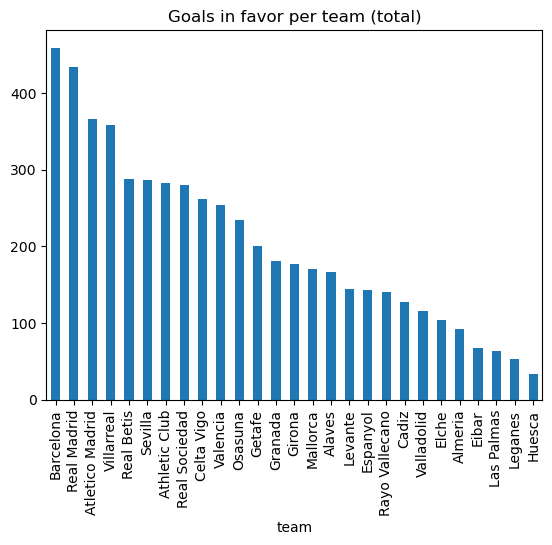

In [64]:
#Exploratory data analysis
#Which teams have been the most offensive ?
football.groupby("team")['gf'].sum().sort_values(ascending=False).plot(kind = 'bar', title ='Goals in favor per team (total)')


In [59]:
#average goals per match for the teams
#group per team and calculate total goals and total matches
goals_per_team = football.groupby('team').agg({'gf':'sum', 'date': 'count'}).rename(columns={'gf': 'total_goals' , 'date' : 'matches'})
#calculate mean
goals_per_team['goals_per_match'] = goals_per_team['total_goals'] / goals_per_team['matches']
#order descending
goals_per_team = goals_per_team.sort_values('goals_per_match', ascending = False)
print(goals_per_team.head())

                 total_goals  matches  goals_per_match
team                                                  
Barcelona              459.0      216         2.125000
Real Madrid            434.0      216         2.009259
Girona                 177.0      102         1.735294
Atletico Madrid        366.0      216         1.694444
Villarreal             358.0      215         1.665116


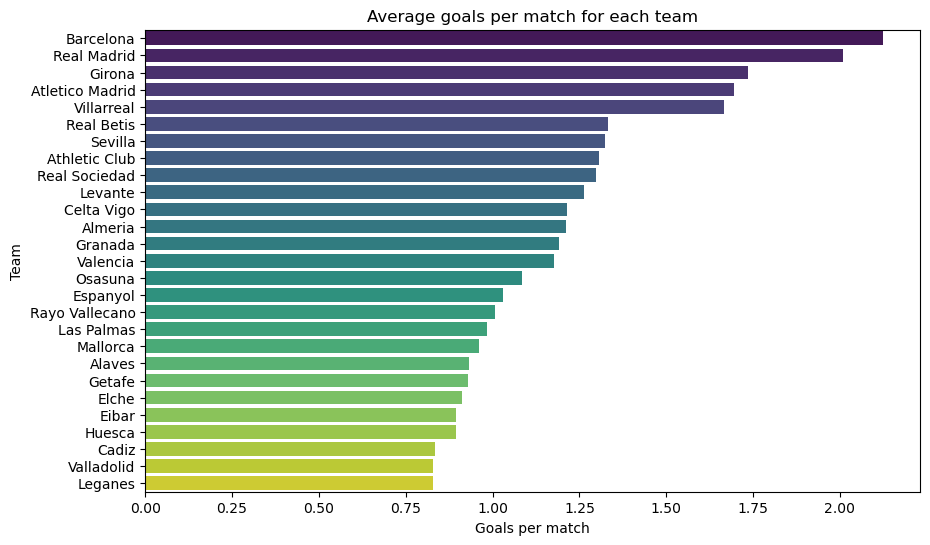

In [65]:
#plot results of average goals per match per team
plt.figure(figsize=(10,6))
sns.barplot( data = goals_per_team.reset_index().sort_values('goals_per_match', ascending=False), x= 'goals_per_match', y='team',hue='team', palette='viridis',legend=False)
plt.title('Average goals per match for each team')
plt.xlabel('Goals per match')
plt.ylabel('Team')
plt.show()


The visualizations show that the teams with the highest total goals scored also tend to have the highest average goals per match. However, Girona stands out as an exception, while it ranks third in average goals per match, it is only 14th in total goals scored.

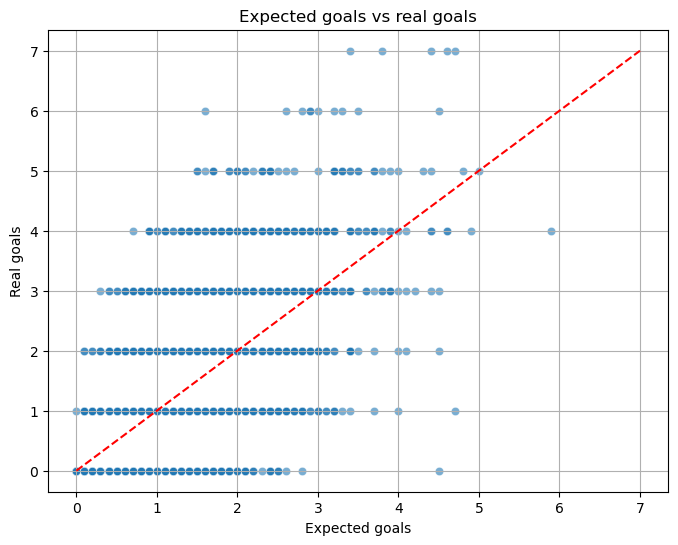

In [75]:
#Lets now explore the relationship between goals expected and goals made.
plt.figure(figsize=(8,6))
sns.scatterplot(x='xg', y='gf', alpha=0.6, data = football)
plt.plot([0, football[['xg','gf']].max().max()],[0, football[['xg','gf']].max().max()], ls='--', color='red')
plt.title('Expected goals vs real goals')
plt.xlabel('Expected goals')
plt.ylabel('Real goals')
plt.grid(True)
plt.show()

The analysis shows that actual goals often exceed expected goals in low xG matches, suggesting teams sometimes outperform expectations in seemingly less promising scenarios. However, in matches with high expected goals, teams are less likely to reach those projections, indicating a potential overestimation in high xG situations.

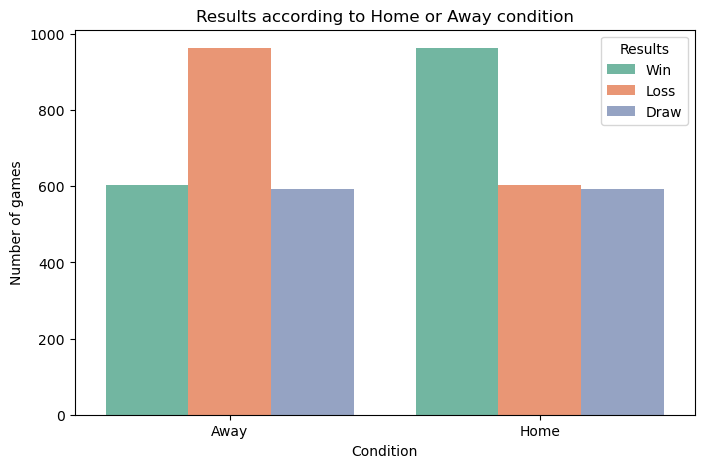

In [77]:
#Now lets analyse if playing at home gives teams a higher chance of winning.
football['match_outcome'] = football['result'].apply( lambda x: 'Win' if x == 'W' else('Draw' if x == 'D' else 'Loss'))
plt.figure(figsize=(8,5))
sns.countplot(data=football, x='venue', hue='match_outcome', palette='Set2')
plt.title('Results according to Home or Away condition')
plt.xlabel('Condition')
plt.ylabel('Number of games')
plt.legend(title= 'Results')
plt.show()

In [79]:
#Lets check the probability of winning
home_wins= football[(football['venue']=='Home') & (football['result']=='W')].shape[0]
away_wins= football[(football['venue']=='Away') & (football['result']=='W')].shape[0]
total_home = football[football['venue']=='Home'].shape[0]
total_away = football[football['venue']=='Away'].shape[0]

print(f"Winning in Home percentage: {home_wins / total_home:.2%}")
print(f"Winning Away percentage: {away_wins / total_away:.2%}")

Winning in Home percentage: 44.60%
Winning Away percentage: 27.93%


The analysis reveals a noticeable home-field advantage in La Liga matches. Teams are considerably more likely to secure a win when playing at their home stadium compared to when playing as visitors. This trend suggests that factors such as crowd support, familiarity with the pitch, and reduced travel fatigue may contribute to improved performance at home.

In [83]:
#Which team is the most efficient at scoring penalty goals
penalty_stats = football.groupby('team')[['pk','pkatt']].sum()
penalty_stats['efficiency'] = penalty_stats['pk'] / penalty_stats['pkatt']
penalty_stats = penalty_stats.sort_values('efficiency', ascending=False)

In [84]:
#filter teams with few penalty kicks
filtered_stats = penalty_stats[penalty_stats['pkatt'] >= 5]

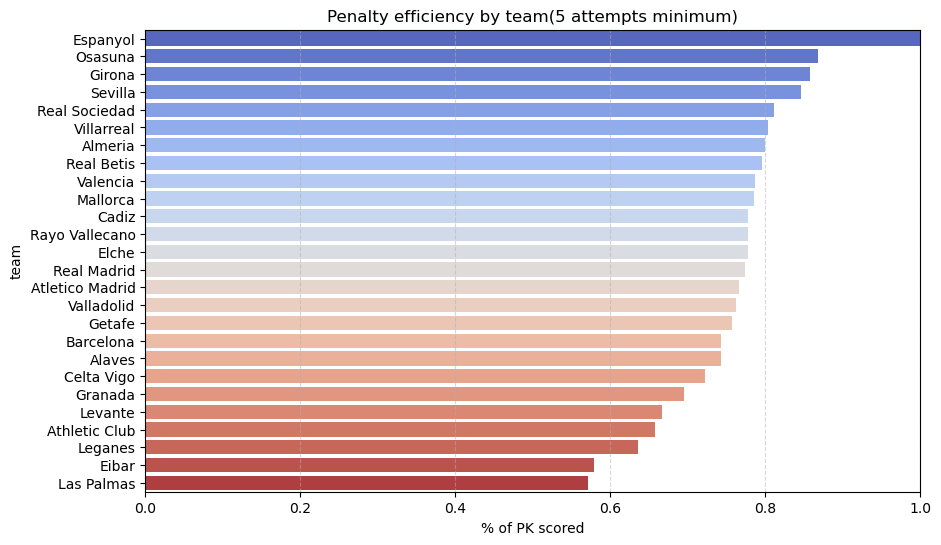

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(data=filtered_stats.reset_index(), x='efficiency', y='team',hue='team', palette='coolwarm')
plt.title('Penalty efficiency by team(5 attempts minimum)')
plt.xlabel('% of PK scored')
plt.ylabel('team')
plt.xlim(0,1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

Espanyol stood out with a perfect penalty conversion rate of 100%. Interestingly, other mid-table teams such as Osasuna and Girona also displayed higher penalty efficiency than traditional powerhouses like Barcelona and Real Madrid. This suggests that efficiency from the spot is not necessarily correlated with overall team strength or league position

In [95]:
#Finally, lets check on how weekday and hour can affect the team efficiency
#add column with points per match
def get_points(result):
    if result =='W':
        return 3
    elif result =='D':
        return 1
    else:
        return 0
football['points'] = football['result'].apply(get_points)

In [96]:
#make sure hour is correctly formatted
football['hour'] = pd.to_datetime(football['time'], format='%H:%M', errors ='coerce').dt.hour

In [114]:
#create heatmap
heatmap_data = football.pivot_table(values='points', index='day', columns='hour', aggfunc='mean')
print(heatmap_data.head())


hour    12        13        14        15       16        17        18  \
day                                                                     
Fri    NaN       NaN       NaN       NaN  1.50000  1.500000  1.250000   
Mon    NaN       NaN       NaN       NaN      NaN  1.000000  1.000000   
Sat    NaN  1.462963  1.365854  1.500000  1.36129  1.340909  1.363905   
Sun   1.42  1.500000  1.350000  1.333333  1.36875  1.420000  1.349462   
Thu    NaN       NaN  1.500000       NaN  1.00000  1.250000  1.166667   

hour        19        20        21        22  
day                                           
Fri   1.333333  1.333333  1.364865  1.333333  
Mon   1.321429  1.333333  1.350000  1.300000  
Sat   1.288462  1.500000  1.377246  1.363636  
Sun   1.392157  1.375000  1.350829  1.400000  
Thu   1.371795  1.300000  1.450000  1.458333  


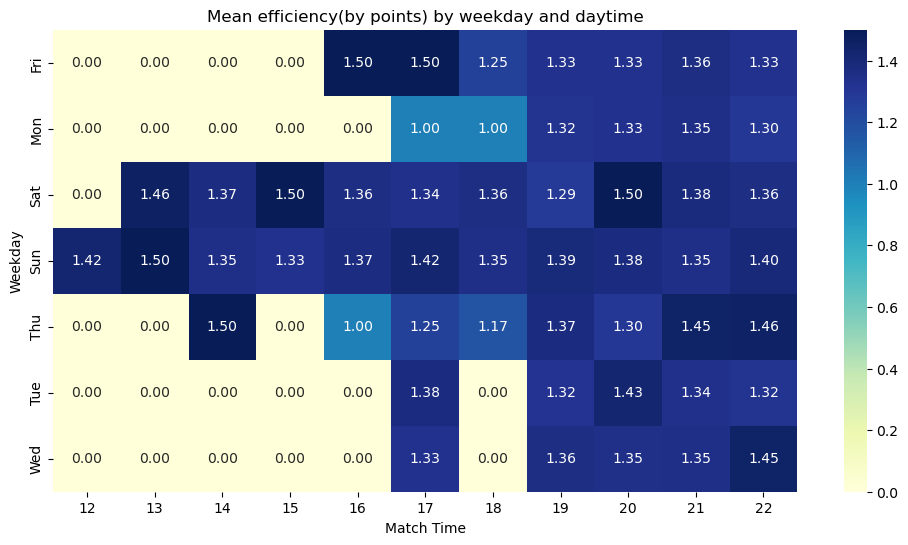

In [115]:
#plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.fillna(0), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Mean efficiency(by points) by weekday and daytime')
plt.xlabel('Match Time')
plt.ylabel('Weekday')
plt.show()
            

The heatmap shows that the average points earned across different days and hours range between 1.0 and 1.5. 
This suggests that match outcomes are relatively balanced regardless of schedule, with most games ending in draws or occasional wins. 
There is no clear pattern indicating that a specific day or time consistently favors winning teams.

## **Conclusion**
Through an exploratory analysis of La Liga matches from 2019 to 2025, we uncovered several performance trends across teams and match contexts. The most offensive teams stood out not only by total goals scored, but also by their consistency in goals per match. A moderate correlation was observed between expected goals (xG) and actual goals, highlighting differences in finishing efficiency among clubs. Home advantage showed a clear impact on match outcomes, while penalty conversion rates varied significantly between teams. Lastly, the heatmap of average points by day and hour suggested no strong temporal patterns, with most matches yielding results between a draw and a win. These insights help frame a data-driven understanding of team efficiency, match dynamics, and contextual factors in Spain’s top football league.

## **Next Steps**
Moving forward, the next steps will focus on deepening the analysis and expanding predictive capabilities. First, we can identify teams that consistently over- or under-perform their xG, potentially highlighting tactical or player-level inefficiencies. Additionally, segmenting performance by season could reveal the long-term impact of events like the COVID-19 pandemic. Incorporating attendance, referee, and formation data may uncover hidden influences on outcomes. Finally, building a basic predictive model to estimate match results or goal counts using features like xG, possession, and venue could provide valuable forecasting insights for future matches.